In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report

In [200]:
df = pd.read_csv('Dataset/SaYoPillow.csv')
df.head()

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


In [201]:
# Checking the dimension of the dataframe
df.shape

(630, 9)

In [202]:
# Renaming the columns for better understanding
df = df.rename(columns={'sr': 'snoring_rate', 'rr': 'respiration_rate', 't': 'body_temperature', 'lm': 'limb_mov_rate', 'bo':'blood_ox_level', 'rem': 'eye_movement', 'sr.1':'num_hours_sleep', 'hr': 'heart_rate', 'sl':'stress_level'})

In [203]:
# Checking for missing values and duplicates
df.isnull().sum()

snoring_rate        0
respiration_rate    0
body_temperature    0
limb_mov_rate       0
blood_ox_level      0
eye_movement        0
num_hours_sleep     0
heart_rate          0
stress_level        0
dtype: int64

In [204]:
df.duplicated().sum()

0

In [205]:
# What is the dataframe information?

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   snoring_rate      630 non-null    float64
 1   respiration_rate  630 non-null    float64
 2   body_temperature  630 non-null    float64
 3   limb_mov_rate     630 non-null    float64
 4   blood_ox_level    630 non-null    float64
 5   eye_movement      630 non-null    float64
 6   num_hours_sleep   630 non-null    float64
 7   heart_rate        630 non-null    float64
 8   stress_level      630 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 44.4 KB


### Exploration and Visualization

In [206]:
# Check out the descriptive statistics of the data

des_stat = df.describe()
des_stat

,snoring_rate,respiration_rate,body_temperature,limb_mov_rate,blood_ox_level,eye_movement,num_hours_sleep,heart_rate,stress_level
count,630.000000,630.000000,630.00000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000
mean,71.600000,21.800000,92.80000,11.700000,90.900000,88.500000,3.700000,64.500000,2.000000
std,19.372833,3.966111,3.52969,4.299629,3.902483,11.893747,3.054572,9.915277,1.415337
min,45.000000,16.000000,85.00000,4.000000,82.000000,60.000000,0.000000,50.000000,0.000000
25%,52.500000,18.500000,90.50000,8.500000,88.500000,81.250000,0.500000,56.250000,1.000000
50%,70.000000,21.000000,93.00000,11.000000,91.000000,90.000000,3.500000,62.500000,2.000000
75%,91.250000,25.000000,95.50000,15.750000,94.250000,98.750000,6.500000,72.500000,3.000000
max,100.000000,30.000000,99.00000,19.000000,97.000000,105.000000,9.000000,85.000000,4.000000


- From the descriptive statistics, there seems to be no outliers
- Next is to use boxplots to confirm the narrative

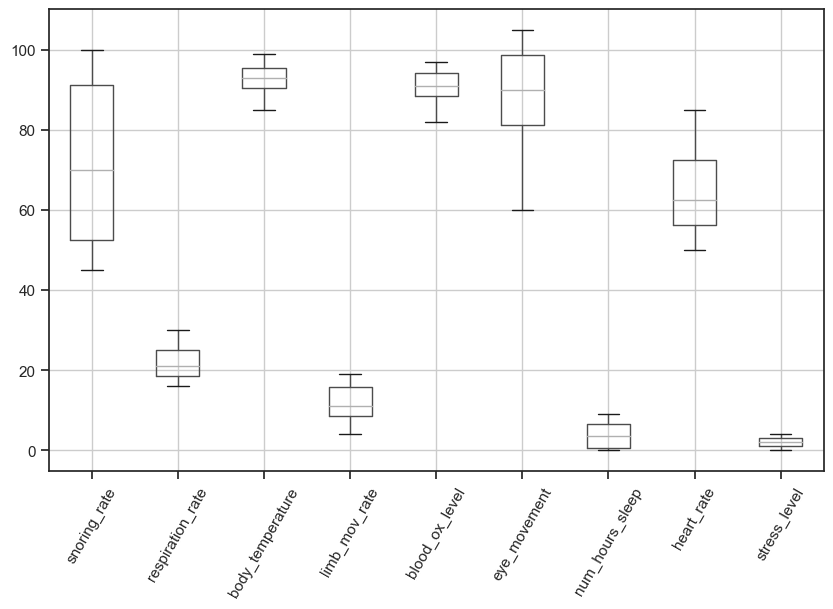

In [207]:
# Use Box plots to check for outliers

plt.figure(figsize=(10, 6))
df.boxplot()
plt.xticks(rotation=60)
plt.show()

 - The data does not contain outliers



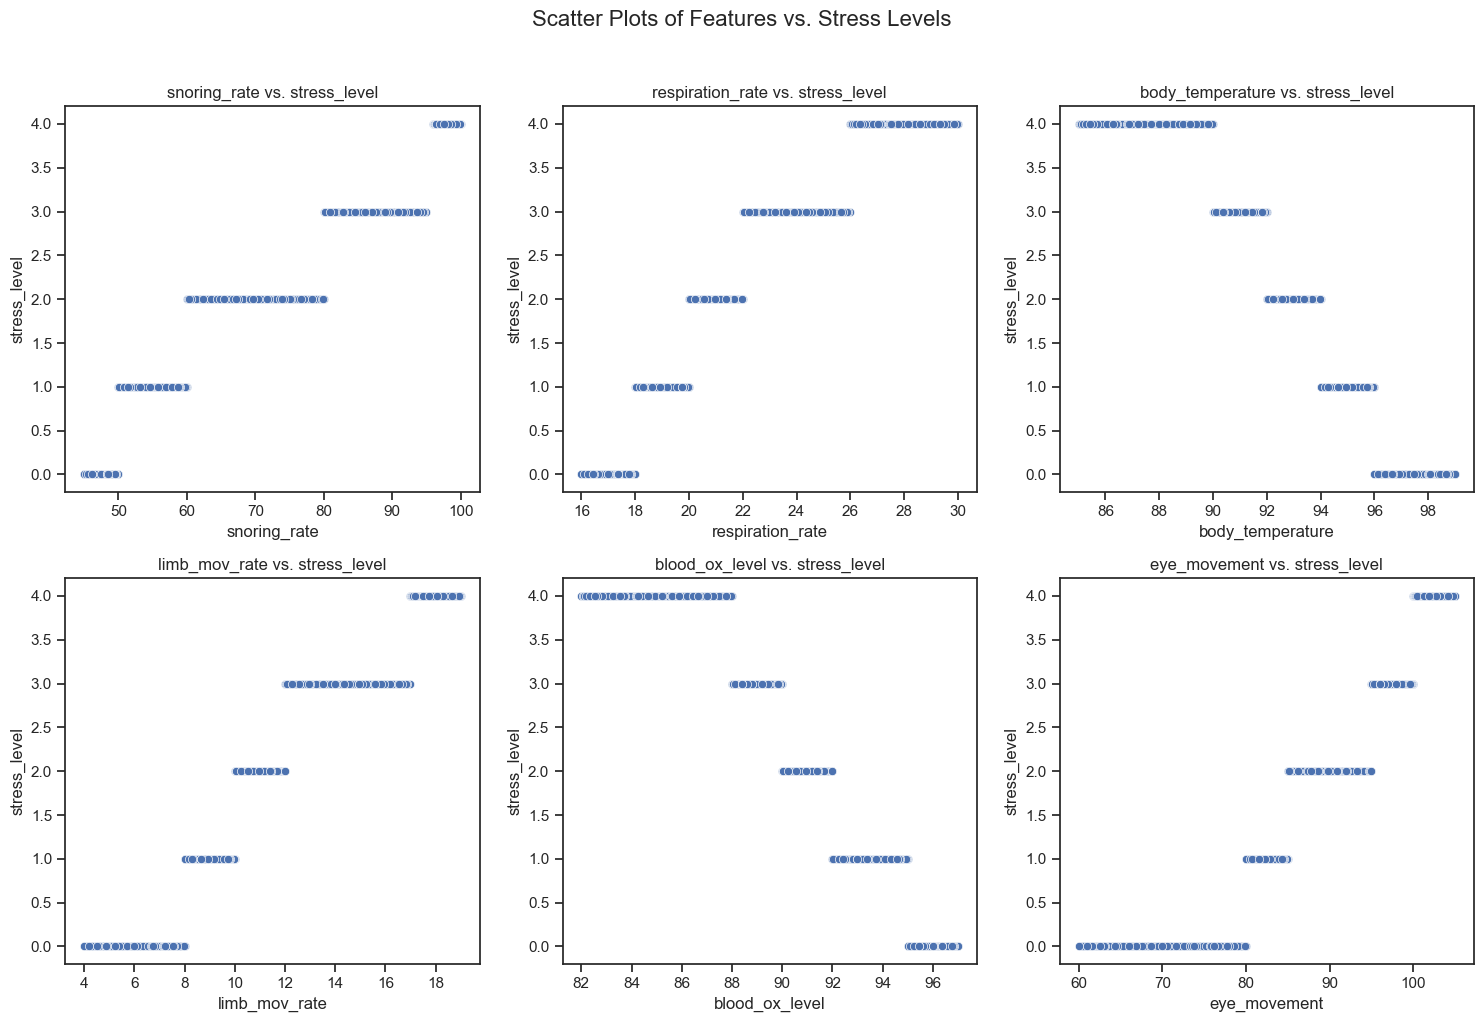

In [208]:
# Create a pairplot of scatter plots
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
plt.subplots_adjust(hspace=0.5)

# Define the variables for x and y axes
x_vars = ['snoring_rate', 'respiration_rate', 'body_temperature', 'limb_mov_rate',
          'blood_ox_level', 'eye_movement', 'num_hours_sleep', 'heart_rate']
y_var = 'stress_level'

# Plot scatter plots in subplots
for i, ax in enumerate(axes.flatten()):
    if i < len(x_vars):
        sns.scatterplot(data=df, x=x_vars[i], y=y_var, ax=ax)
        ax.set_title(f'{x_vars[i]} vs. {y_var}')
    else:
        ax.remove()  # Remove unused subplots

# Adjust plot layout
plt.suptitle('Scatter Plots of Features vs. Stress Levels', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()


##### The pairplot shows that:
stress level increases with increase in
-  snoring rate
- respiration rate
- limb movement rate
- movement

and decreases with increase in
- body_temperature
- heart_rate

### How correlated are the features to one another?

In [209]:
corr = df.corr()
corr

,snoring_rate,respiration_rate,body_temperature,limb_mov_rate,blood_ox_level,eye_movement,num_hours_sleep,heart_rate,stress_level
snoring_rate,1.000000,0.976268,-0.902475,0.981078,-0.903140,0.950600,-0.920554,0.976268,0.975322
respiration_rate,0.976268,1.000000,-0.889237,0.991738,-0.889210,0.935572,-0.891855,1.000000,0.963516
body_temperature,-0.902475,-0.889237,1.000000,-0.896412,0.998108,-0.857299,0.954860,-0.889237,-0.962354
limb_mov_rate,0.981078,0.991738,-0.896412,1.000000,-0.898527,0.964703,-0.901102,0.991738,0.971071
blood_ox_level,-0.903140,-0.889210,0.998108,-0.898527,1.000000,-0.862136,0.950189,-0.889210,-0.961092
eye_movement,0.950600,0.935572,-0.857299,0.964703,-0.862136,1.000000,-0.893952,0.935572,0.951988
num_hours_sleep,-0.920554,-0.891855,0.954860,-0.901102,0.950189,-0.893952,1.000000,-0.891855,-0.973036
heart_rate,0.976268,1.000000,-0.889237,0.991738,-0.889210,0.935572,-0.891855,1.000000,0.963516
stress_level,0.975322,0.963516,-0.962354,0.971071,-0.961092,0.951988,-0.973036,0.963516,1.000000


### Visualizing the correlations

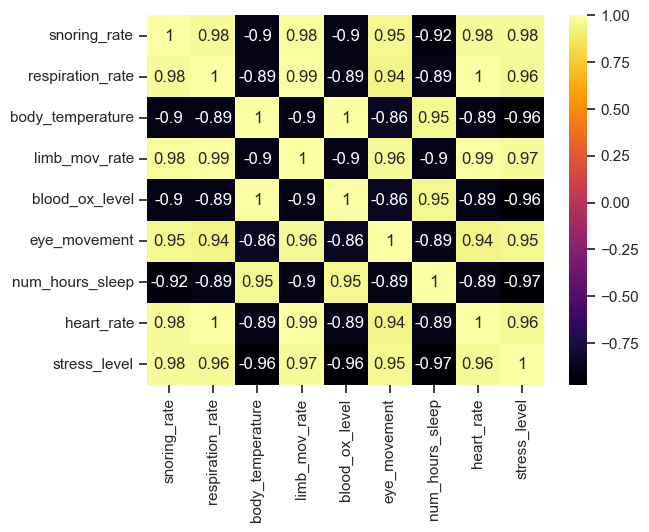

In [210]:
sns.heatmap(corr, annot=True, cmap='inferno', cbar=True)
plt.show()

                                  Distribution of each of the features




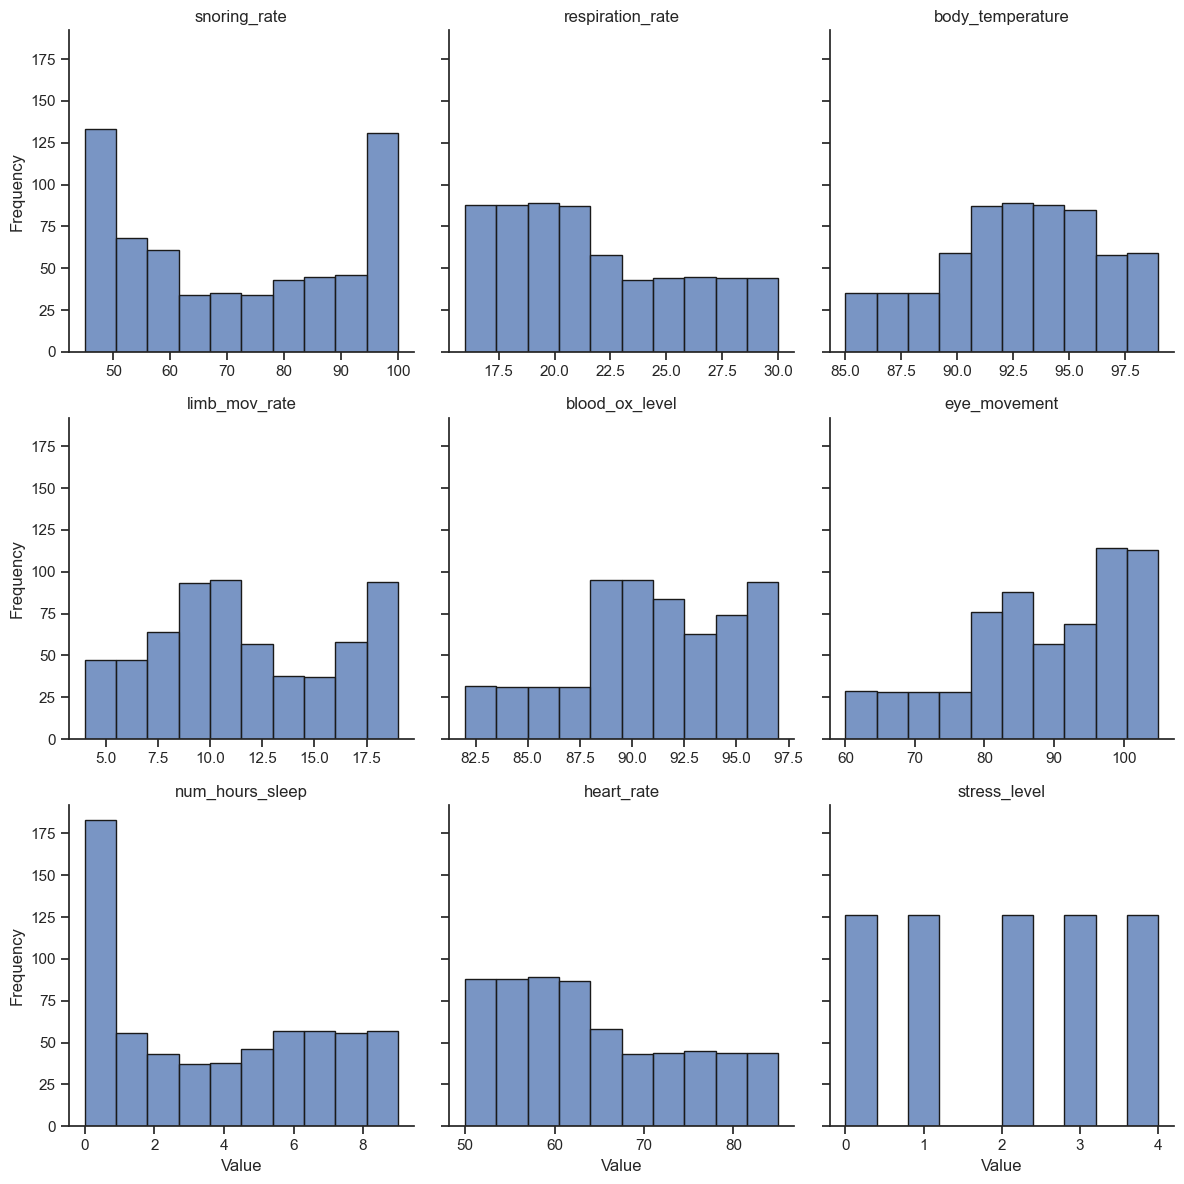

In [211]:
# Create a FacetGrid for multiple histograms
print('                                  Distribution of each of the features',)
print('\n')
variables_to_plot = ['snoring_rate', 'respiration_rate', 'body_temperature', 'limb_mov_rate',
       'blood_ox_level', 'eye_movement', 'num_hours_sleep', 'heart_rate',
       'stress_level']
g = sns.FacetGrid(df.melt(value_vars=variables_to_plot), col='variable', col_wrap=3, sharex=False, height=4)

# Plot histograms for each variable
g.map(sns.histplot, 'value', bins=10, edgecolor='k')

# Set axis labels and titles
g.set_axis_labels('Value', 'Frequency')
g.set_titles('{col_name}')

# Adjust plot layout
plt.tight_layout()
plt.show()

### Model Building

In [212]:
df.head()

,snoring_rate,respiration_rate,body_temperature,limb_mov_rate,blood_ox_level,eye_movement,num_hours_sleep,heart_rate,stress_level
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


In [213]:
df.stress_level.value_counts()

3    126
1    126
0    126
2    126
4    126
Name: stress_level, dtype: int64

- The stress level has a balanced class. This is good for the model training

In [214]:
features = df.drop('stress_level', axis=1)
target = df['stress_level']

In [215]:
features.head(), target.head()

(   snoring_rate  respiration_rate  body_temperature  limb_mov_rate  \
 0         93.80            25.680            91.840         16.600   
 1         91.64            25.104            91.552         15.880   
 2         60.00            20.000            96.000         10.000   
 3         85.76            23.536            90.768         13.920   
 4         48.12            17.248            97.872          6.496   
 
    blood_ox_level  eye_movement  num_hours_sleep  heart_rate  
 0          89.840         99.60            1.840       74.20  
 1          89.552         98.88            1.552       72.76  
 2          95.000         85.00            7.000       60.00  
 3          88.768         96.92            0.768       68.84  
 4          96.248         72.48            8.248       53.12  ,
 0    3
 1    3
 2    1
 3    3
 4    0
 Name: stress_level, dtype: int64)

In [216]:
target.dtype

dtype('int64')

In [217]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.15, random_state=12)

In [218]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((535, 8), (95, 8), (535,), (95,))

### Scaling the features

In [219]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

### Initialize the grid search method

In [220]:
# Define a dictionary with estimators and their parameter grids
estimators = {
    'LogisticRegression': {
        'estimator': LogisticRegression(),
        'param_grid': {
            'penalty': ['l2'],
            'C': [0.001, 0.01, 0.1, 1, 10, 100],
            'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
            'max_iter': [100, 300, 500],
            'class_weight': [None, 'balanced']
        }
    },
    'RandomForestClassifier': {
        'estimator': RandomForestClassifier(),
        'param_grid': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'bootstrap': [True, False]
        }
    },
    'SVC': {
        'estimator': SVC(),
        'param_grid': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf'],
            'gamma': ['scale', 'auto'] + [0.001, 0.01, 0.1, 1, 10]
        }
    }
}

# Iterate over estimators and perform GridSearchCV
for estimator_name, estimator_data in estimators.items():
    print(f"Grid search for {estimator_name}")
    
    model = estimator_data['estimator']
    param_grid = estimator_data['param_grid']
    
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)

    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_
 

    accuracy = best_model.score(X_test_scaled, y_test)
    print(f"Best Hyperparameters: {best_params}")
    print(f"Test Accuracy with Best Model: {accuracy:.4f}")
    print("-" * 40)

Grid search for LogisticRegression
Fitting 5 folds for each of 180 candidates, totalling 900 fits
Best Hyperparameters: {'C': 0.1, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
Test Accuracy with Best Model: 1.0000
----------------------------------------
Grid search for RandomForestClassifier
Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Hyperparameters: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Test Accuracy with Best Model: 0.9895
----------------------------------------
Grid search for SVC
Fitting 5 folds for each of 42 candidates, totalling 210 fits
Best Hyperparameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Test Accuracy with Best Model: 1.0000
----------------------------------------


In [221]:
# You can now use the best models for prediction
model = RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=50)
model.fit(X_train_scaled, y_train)


RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=50)

### What is the training accuracy??

In [222]:
print('The training accuracy is: \n', model.score(X_train_scaled, y_train))

The training accuracy is: 
 1.0


In [223]:
#  Make predictions using the best Random Forest model
y_pred = model.predict(X_test_scaled)

In [224]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.94      0.97        17
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        23
           4       1.00      1.00      1.00        21

    accuracy                           0.99        95
   macro avg       0.99      0.99      0.99        95
weighted avg       0.99      0.99      0.99        95



### Saving the model

In [225]:
import pickle


filename = 'stress_level_model.pkl'

with open(filename, 'wb') as file:
    pickle.dump(model, file)

### Prediction System

In [226]:
X_train.sample(5)

,snoring_rate,respiration_rate,body_temperature,limb_mov_rate,blood_ox_level,eye_movement,num_hours_sleep,heart_rate
465,51.52,18.304,94.304,8.304,92.456,80.76,5.304,55.76
398,86.84,23.824,90.912,14.280,88.912,97.28,0.912,69.56
434,84.08,23.088,90.544,13.360,88.544,96.36,0.544,67.72
163,66.08,20.608,92.608,10.608,90.608,88.04,2.912,61.52
551,91.88,25.168,91.584,15.960,89.584,98.96,1.584,72.92


### Loading the model for prediction

In [227]:
with open('stress_level_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)


In [228]:
input_data = (45.728, 19.728, 65.160, 14.864, 68.592, 76.54, 8.000, 79.32)
input_data_array = np.array(input_data)

# Reshape the array since we are predicting for one instance
input_data_reshaped = input_data_array.reshape(1, -1)


prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if prediction == 0:
    print('This person is normal!')
elif prediction == 1:
    print('The stress level is low')
elif prediction == 2:
    print('The stress level is medium')
elif prediction == 3:
    print('The stress level is medium high, get some rest please')
else:
    print('The stress level is high! You need to get some rest asap!')

[4]
The stress level is high! You need to get some rest asap!
